In [8]:
import warnings
warnings.filterwarnings('ignore')
from dropout_bayesian import dataset, Current
# 데이터 불러오기
df = dataset(label = '역률평균', freq = '30min')
# current 클래스 생성
current = Current(df)

In [9]:
# index는 시간 단위 timestamp
# 역률평균, R S T 상역률로 역률평균을 예측
df.describe()

,역률평균,R상역률,S상역률,T상역률,LABEL_NAME
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.0
mean,0.949094,0.943735,0.948003,0.949587,0.0
std,0.006327,0.006687,0.006396,0.007583,0.0
min,0.925978,0.917448,0.925260,0.921615,0.0
25%,0.945010,0.939844,0.944532,0.944532,0.0
50%,0.949561,0.943229,0.946875,0.952474,0.0
75%,0.952331,0.947298,0.951074,0.955078,0.0
max,0.965136,0.960938,0.964844,0.963542,0.0


Epoch 1/150
4/4 [==============================] - 5s 400ms/step - loss: 1.4121 - val_loss: 1.2341
Epoch 2/150
4/4 [==============================] - 1s 149ms/step - loss: 0.9122 - val_loss: 1.1144
Epoch 3/150
4/4 [==============================] - 1s 144ms/step - loss: 0.8680 - val_loss: 0.8505
Epoch 4/150
4/4 [==============================] - 1s 148ms/step - loss: 0.7683 - val_loss: 1.0567
Epoch 5/150
4/4 [==============================] - 1s 153ms/step - loss: 0.6526 - val_loss: 0.5545
Epoch 6/150
4/4 [==============================] - 1s 151ms/step - loss: 0.5849 - val_loss: 0.4885
Epoch 7/150
4/4 [==============================] - 1s 150ms/step - loss: 0.4729 - val_loss: 0.4659
Epoch 8/150
4/4 [==============================] - 1s 150ms/step - loss: 0.3886 - val_loss: 0.3881
Epoch 9/150
4/4 [==============================] - 1s 155ms/step - loss: 0.3128 - val_loss: 0.3280
Epoch 10/150
4/4 [==============================] - 1s 151ms/step - loss: 0.2484 - val_loss: 0.2524
Epoch 11/

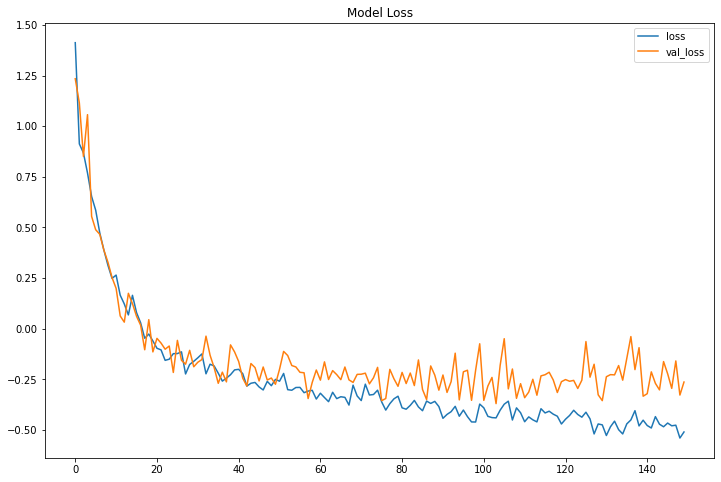

100%|██████████| 30/30 [00:14<00:00,  2.04it/s]


rmse: 0.5061078667640686
r2: 0.6918623737603555
For Uncertainty model, 0.7146974063400576 are in 99% confidence interval


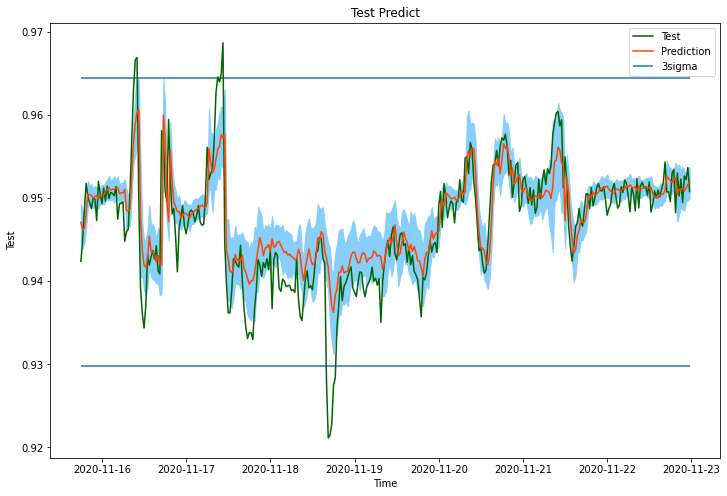

In [10]:
# Transformer LSTM 모델로 예측
# - 양방향 LSTM 2개와 FF layer 쌓은 트랜스포머 구조
# - key_dim : multihead attention 입력 차원
# - num_head : 병렬을 얼마나 할 것인지
# - ff_dim : FF 신경망 units
# - num_blocks : 트랜스포머 블록 층 (2개 이상이면 loss 크게 증가해서 1개로 한다)
model = current.Transfomer_LSTM(key_dim = 128, num_heads=2, ff_dim=128, num_blocks=1)

# 150번 반복, Adam optimizer
model = current.fit(model=model, epochs = 150, batch_size = 256, show_loss = True)

# Monte Carlo 샘플링 20번, 99% 신뢰구간 추정
TransformerLSTM_predict = current.predict_ci(model=model, n_sample = 30, ci=2.58, show= True)

In [11]:
TransformerLSTM_predict.to_csv('result.csv')

In [14]:
TransformerLSTM_predict

,역률평균,R상역률,S상역률,T상역률,LABEL_NAME,predict,predict_low,predict_up,sigma_upper,sigma_lower
TIMESTAMP,,,,,,,,,,
2020-11-15 18:00:00,0.943477,0.937240,0.939844,0.947657,0.0,0.947090,0.944899,0.949281,0.964435,0.929739
2020-11-15 18:30:00,0.945605,0.938672,0.942578,0.949479,0.0,0.946161,0.943888,0.948433,0.964435,0.929739
2020-11-15 19:00:00,0.948692,0.941927,0.945703,0.952604,0.0,0.946376,0.944638,0.948114,0.964435,0.929739
2020-11-15 19:30:00,0.951203,0.944271,0.947526,0.955339,0.0,0.948315,0.946409,0.950221,0.964435,0.929739
2020-11-15 20:00:00,0.949868,0.942969,0.947135,0.953776,0.0,0.950497,0.948954,0.952040,0.964435,0.929739
...,...,...,...,...,...,...,...,...,...,...
2020-11-22 21:30:00,0.949296,0.943360,0.945964,0.952865,0.0,0.951213,0.948597,0.953829,0.964435,0.929739
2020-11-22 22:00:00,0.951944,0.945833,0.948438,0.955339,0.0,0.950886,0.948536,0.953237,0.964435,0.929739
2020-11-22 22:30:00,0.951579,0.945052,0.947526,0.955339,0.0,0.951177,0.949576,0.952778,0.964435,0.929739


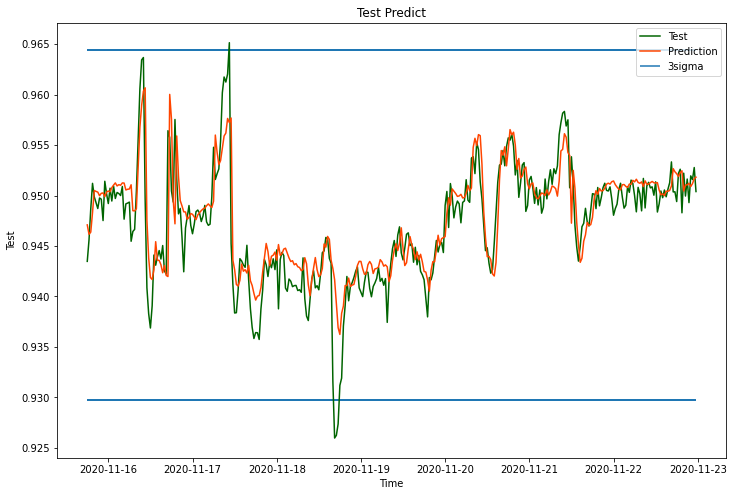

In [15]:
import matplotlib.pyplot as plt
tx = TransformerLSTM_predict.index
plt.figure(figsize=(12,8))
plt.plot(tx, TransformerLSTM_predict['역률평균'],'darkgreen')
plt.plot(tx, TransformerLSTM_predict['predict'], 'orangered')
plt.hlines(TransformerLSTM_predict['sigma_upper'], tx[0], tx[-1])
plt.hlines(TransformerLSTM_predict['sigma_lower'], tx[0], tx[-1])

plt.xlabel('Time')
plt.ylabel('Test')
plt.legend(['Test','Prediction','3sigma'],loc='upper right')
plt.title('Test Predict')
plt.show() 

In [5]:
# 수평선은 데이터의 3시그마 값
# 푸른 범위가 모델의 추정된 99% 신뢰구간 

Epoch 1/150
4/4 [==============================] - 2s 152ms/step - loss: 1.9903 - val_loss: 1.3753
Epoch 2/150
4/4 [==============================] - 0s 43ms/step - loss: 1.3390 - val_loss: 1.1466
Epoch 3/150
4/4 [==============================] - 0s 43ms/step - loss: 1.0451 - val_loss: 0.7404
Epoch 4/150
4/4 [==============================] - 0s 50ms/step - loss: 0.7799 - val_loss: 1.1599
Epoch 5/150
4/4 [==============================] - 0s 54ms/step - loss: 0.8116 - val_loss: 0.7936
Epoch 6/150
4/4 [==============================] - 0s 55ms/step - loss: 0.7024 - val_loss: 0.7100
Epoch 7/150
4/4 [==============================] - 0s 57ms/step - loss: 0.5847 - val_loss: 0.4307
Epoch 8/150
4/4 [==============================] - 0s 58ms/step - loss: 0.4159 - val_loss: 0.3702
Epoch 9/150
4/4 [==============================] - 0s 59ms/step - loss: 0.4018 - val_loss: 0.4245
Epoch 10/150
4/4 [==============================] - 0s 66ms/step - loss: 0.3033 - val_loss: 0.3421
Epoch 11/150
4/4 [

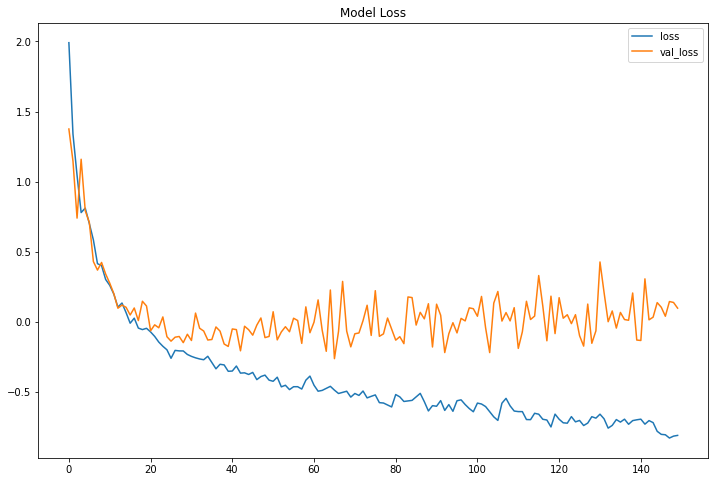

100%|██████████| 30/30 [00:07<00:00,  3.76it/s]


rmse: 0.580731987953186
r2: 0.594295298720654
For Uncertainty model, 0.5561959654178674 are in 99% confidence interval


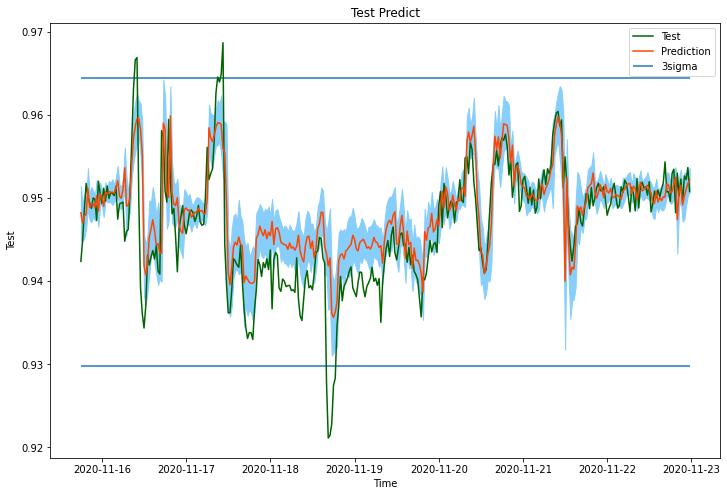

In [12]:
# LSTM 모델
model2 = current.Transfomer_Conv(key_dim = 128, num_heads=2, ff_dim=128, num_blocks=1)
model2 = current.fit(model=model2, epochs = 150, batch_size = 256, show_loss = True)
Conv_predict = current.predict_ci(model=model2, n_sample = 30, ci=2.58, show= True)

Epoch 1/150
4/4 [==============================] - 4s 381ms/step - loss: 0.4327 - val_loss: 0.3993
Epoch 2/150
4/4 [==============================] - 1s 219ms/step - loss: 0.3234 - val_loss: 0.2672
Epoch 3/150
4/4 [==============================] - 1s 256ms/step - loss: 0.2317 - val_loss: 0.0966
Epoch 4/150
4/4 [==============================] - 2s 473ms/step - loss: 0.1256 - val_loss: 0.0275
Epoch 5/150
4/4 [==============================] - 2s 412ms/step - loss: 0.0942 - val_loss: 0.0473
Epoch 6/150
4/4 [==============================] - 1s 250ms/step - loss: 0.0541 - val_loss: -0.0142
Epoch 7/150
4/4 [==============================] - 1s 283ms/step - loss: 0.0191 - val_loss: -0.0814
Epoch 8/150
4/4 [==============================] - 2s 388ms/step - loss: 0.2352 - val_loss: -0.0446
Epoch 9/150
4/4 [==============================] - 1s 275ms/step - loss: 0.0303 - val_loss: 0.0232
Epoch 10/150
4/4 [==============================] - 1s 182ms/step - loss: 0.0535 - val_loss: 0.0335
Epoch 

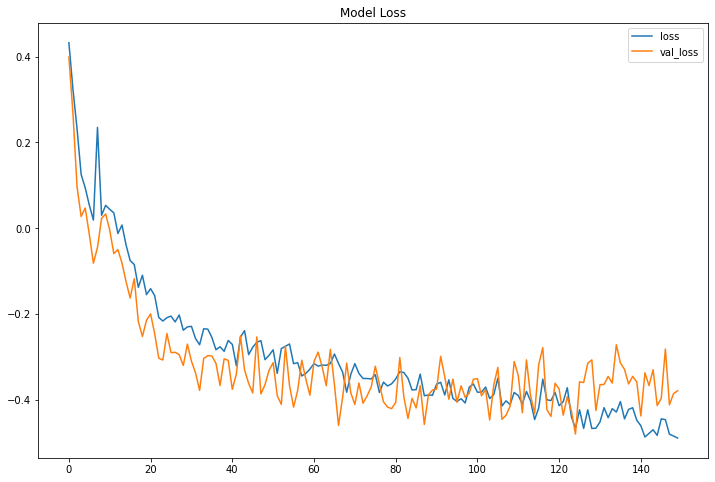

100%|██████████| 30/30 [00:15<00:00,  1.95it/s]


rmse: 0.4766511023044586
r2: 0.7266873549903206
For Uncertainty model, 0.69164265129683 are in 99% confidence interval


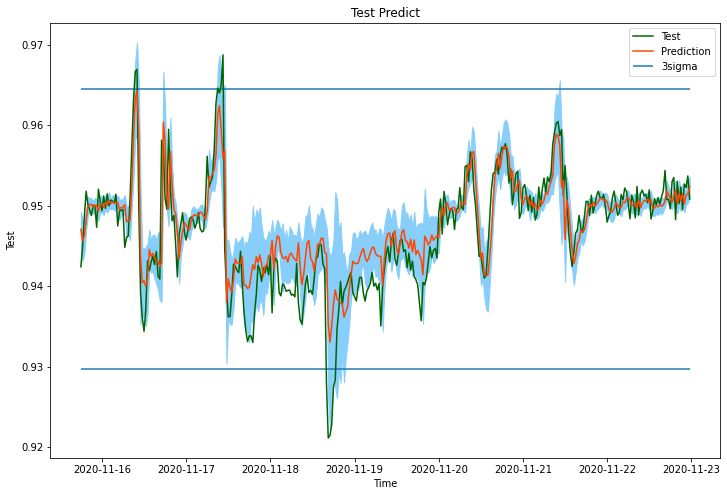

In [13]:
# LSTM 모델
model3 = current.LSTM()
model3 = current.fit(model=model3, epochs = 150, batch_size = 256, show_loss = True)
LSTM_predict = current.predict_ci(model=model3, n_sample = 30, ci=2.58, show= True)